# COVID-19

## Visualizations

The below graphs are based on the public dataset prepared by [OWID](https://ourworldindata.org/) and in the specific on the datasets from their [daily updated repository](https://github.com/owid/covid-19-data/tree/master/public/data). 
For more information about the accuracy of the data please refer to: https://ourworldindata.org/what-can-data-on-testing-tell-us-about-the-pandemic

This notebook is connected to the on-line resource so on each execution it will fetch the updated dataset.

## Initial setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Selected countries (c19df['iso_code'].unique())
#['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
#'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA',
#'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
#'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL',
#'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CPV', 'CRI', 'CUB',
#'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
#'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN',
#'FJI', 'FLK', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA',
#'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM',
#'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN',
#'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY',
#'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR', 'KWT',
#'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX',
#'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI',
#'MLT', 'MMR', 'MNE', 'MNG', 'MNP', 'MOZ', 'MRT', 'MSR', 'MUS',
#'MWI', 'MYS', 'NAM', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR',
#'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL',
#'PRI', 'PRT', 'PRY', 'PSE', 'PYF', 'QAT', 'RKS', 'ROU', 'RUS',
#'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SMR', 'SOM',
#'SRB', 'SSD', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SWZ', 'SXM',
#'SYC', 'SYR', 'TCA', 'TCD', 'TGO', 'THA', 'TLS', 'TTO', 'TUN',
#'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'UZB', 'VAT',
#'VCT', 'VEN', 'VGB', 'VIR', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE',]

c2i = ["ITA", "ESP", "CHE", "DNK"]

# Fetch the data
url_c19 = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
c19df = pd.read_csv(url_c19)



## Pre-processing

In [2]:
# Create a copy with the selected countries
c19_sel = c19df.loc[c19df['iso_code'].isin(c2i)].copy()

# Convert to datetime
c19_sel['date'] = pd.to_datetime(c19_sel['date'])

c19_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 2249 to 6759
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  479 non-null    object        
 1   location                  479 non-null    object        
 2   date                      479 non-null    datetime64[ns]
 3   total_cases               479 non-null    int64         
 4   new_cases                 479 non-null    int64         
 5   total_deaths              479 non-null    int64         
 6   new_deaths                479 non-null    int64         
 7   total_cases_per_million   479 non-null    float64       
 8   new_cases_per_million     479 non-null    float64       
 9   total_deaths_per_million  479 non-null    float64       
 10  new_deaths_per_million    479 non-null    float64       
 11  total_tests               137 non-null    float64       
 12  new_tests         

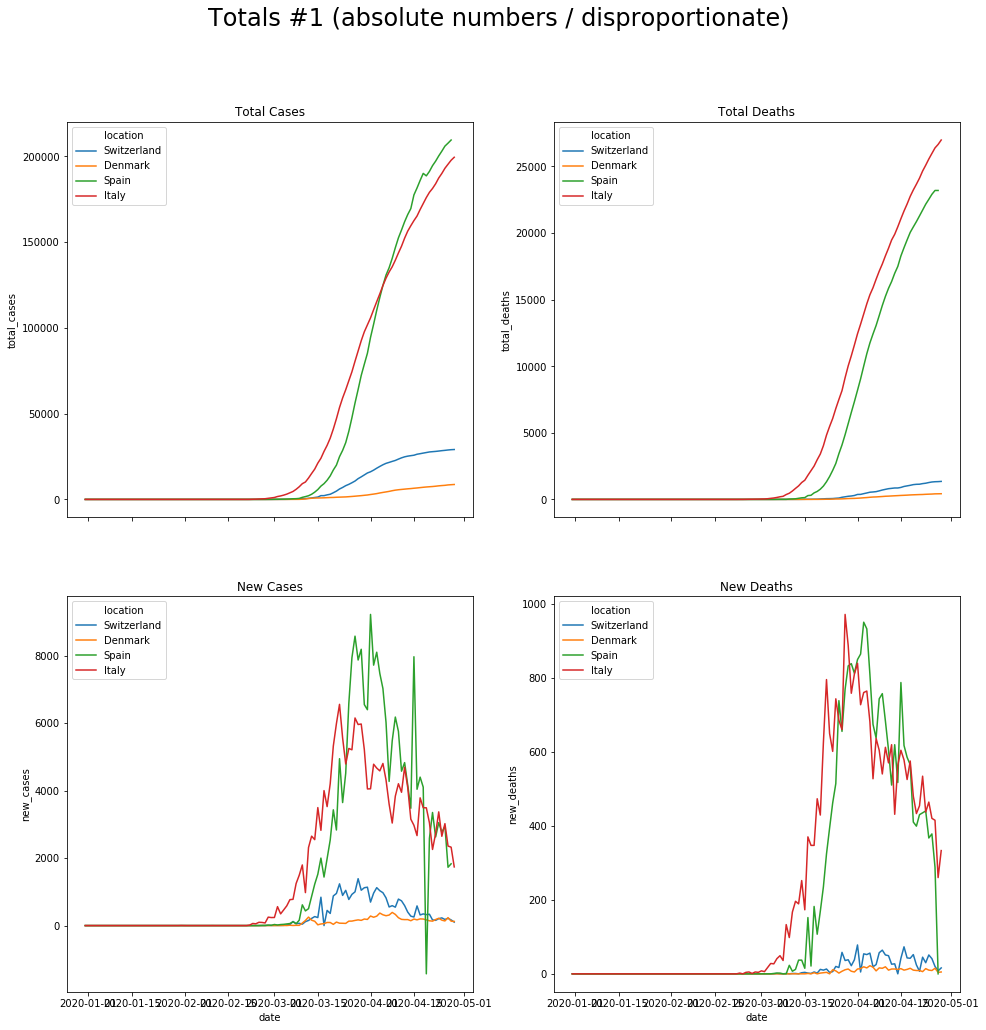

In [3]:
## Plot Totals - different scale Y axis for each plot

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16,16), sharex=True)
fig.suptitle('Totals #1 (absolute numbers / disproportionate)', fontsize=24)

sns.lineplot(x='date', y="total_cases", hue='location', data=c19_sel, ax=ax1).set_title('Total Cases')
sns.lineplot(x='date', y="total_deaths", hue='location', data=c19_sel, ax=ax2).set_title('Total Deaths')
sns.lineplot(x='date', y="new_cases", hue='location', data=c19_sel, ax=ax3).set_title('New Cases')
sns.lineplot(x='date', y="new_deaths", hue='location', data=c19_sel, ax=ax4).set_title('New Deaths')

plt.show()

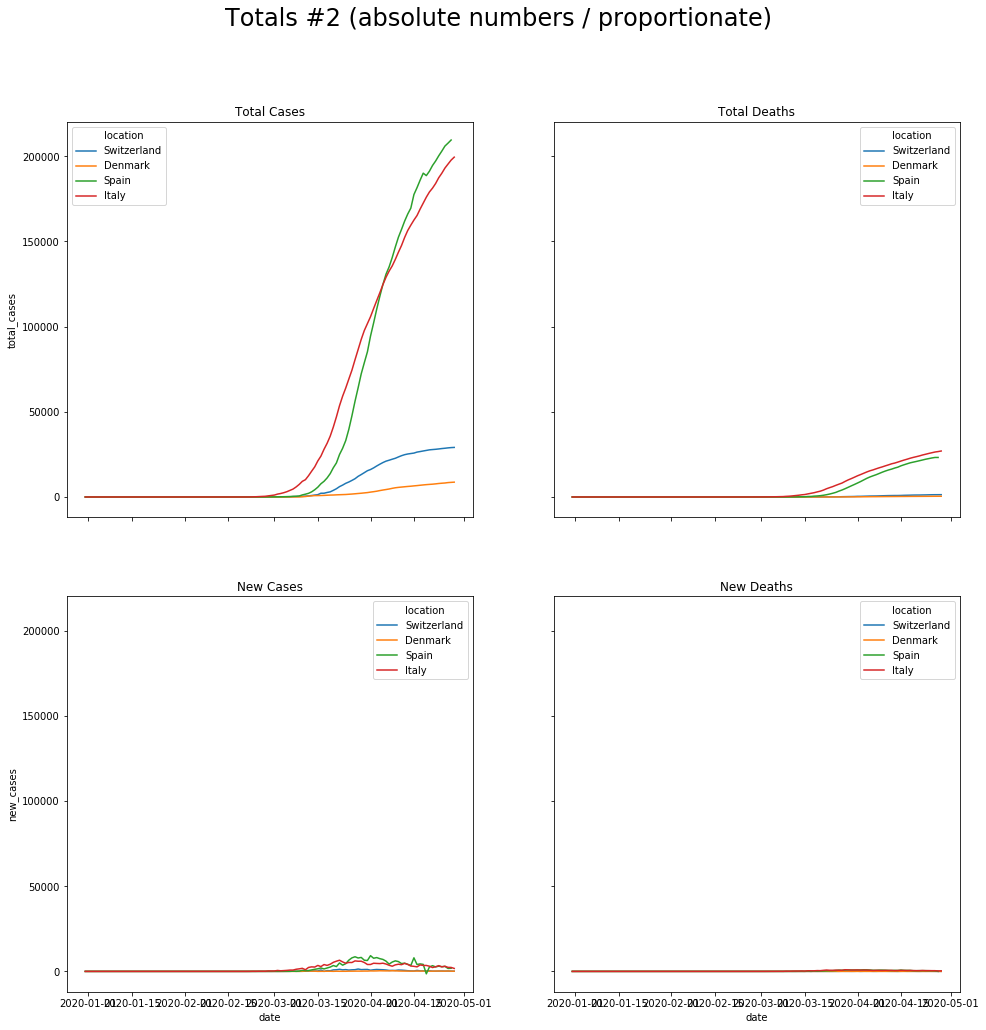

In [4]:
## Plot Totals - unified scale Y axis for each plot

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16,16), sharex=True, sharey=True)
fig.suptitle('Totals #2 (absolute numbers / proportionate)', fontsize=24)

sns.lineplot(x='date', y="total_cases", hue='location', data=c19_sel, ax=ax1).set_title('Total Cases')
sns.lineplot(x='date', y="total_deaths", hue='location', data=c19_sel, ax=ax2).set_title('Total Deaths')
sns.lineplot(x='date', y="new_cases", hue='location', data=c19_sel, ax=ax3).set_title('New Cases')
sns.lineplot(x='date', y="new_deaths", hue='location', data=c19_sel, ax=ax4).set_title('New Deaths')

plt.show()

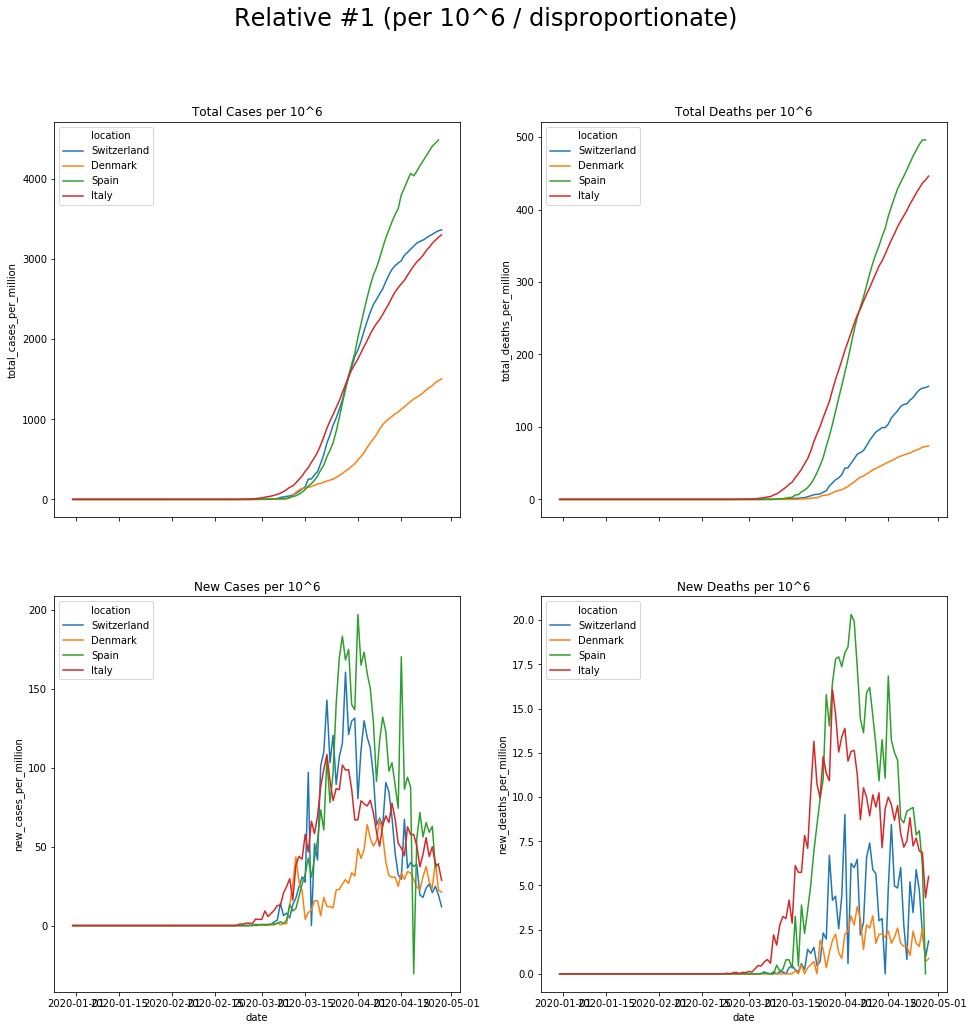

In [5]:
# Normalized to 10^6 - different scale Y axis for each plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16,16), sharex=True)
fig.suptitle('Relative #1 (per 10^6 / disproportionate)', fontsize=24)

sns.lineplot(x='date', y="total_cases_per_million", hue='location', data=c19_sel, ax=ax1).set_title('Total Cases per 10^6')
sns.lineplot(x='date', y="total_deaths_per_million", hue='location', data=c19_sel, ax=ax2).set_title('Total Deaths per 10^6')
sns.lineplot(x='date', y="new_cases_per_million", hue='location', data=c19_sel, ax=ax3).set_title('New Cases per 10^6')
sns.lineplot(x='date', y="new_deaths_per_million", hue='location', data=c19_sel, ax=ax4).set_title('New Deaths per 10^6')

plt.show()

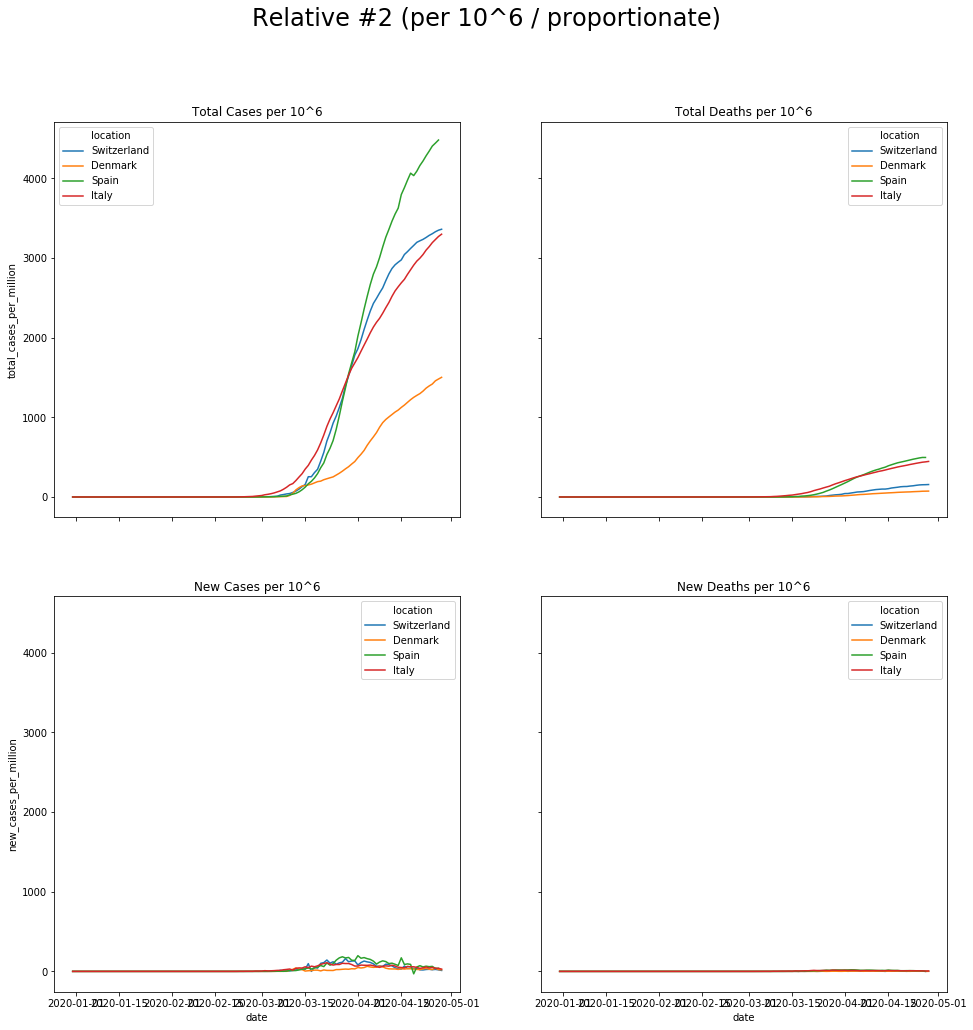

In [6]:
# Normalized to 10^6 - unified scale Y axis for each plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16,16), sharex=True, sharey=True)
fig.suptitle('Relative #2 (per 10^6 / proportionate)', fontsize=24)

sns.lineplot(x='date', y="total_cases_per_million", hue='location', data=c19_sel, ax=ax1).set_title('Total Cases per 10^6')
sns.lineplot(x='date', y="total_deaths_per_million", hue='location', data=c19_sel, ax=ax2).set_title('Total Deaths per 10^6')
sns.lineplot(x='date', y="new_cases_per_million", hue='location', data=c19_sel, ax=ax3).set_title('New Cases per 10^6')
sns.lineplot(x='date', y="new_deaths_per_million", hue='location', data=c19_sel, ax=ax4).set_title('New Deaths per 10^6')

plt.show()